## Table of Contents

### 1. Importing libraries and data
### 2. Data cleaning checks
##### 1. Missing values
##### 2. Duplicates
##### 3. Extreme values
### 3. Scatterplots and correlation
##### 1. Scatterplots
##### 2. Correlation
### 4. Hypothesis
### 5. Prep for regression
### 6. Regression Analysis
### 7. Perform linear regression analysis - SAT_AVG & FAMINC
##### 1. Pre-regression checks
##### 2. Regression analysis

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure charts show in notebook
%matplotlib inline

In [3]:
# Change options to display all columns
pd.options.display.max_columns = None

In [4]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [6]:
# Import data for private non-profit institutions
private = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'private_data.pkl'))

In [7]:
# Check output
private

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,491710,Yeshiva Gedolah of Cliffwood,Keyport,NJ,07735-5105,2,21.0,14150.0,7150.0,16500.0,58552.450000,0.5854,NaN,84.0,0.9500,1.0000,Lower cost
1398,491765,Yeshivas Emek Hatorah,Howell,NJ,07731-2444,2,21.0,27190.0,20141.0,16500.0,58552.450000,NaN,NaN,46.0,0.7527,1.0000,Middle cost
1399,491817,Seminary Bnos Chaim,Lakewood,NJ,08701-2336,2,13.0,19886.0,14145.0,16500.0,58552.450000,0.8056,NaN,159.0,0.7527,1.0000,Lower cost
1400,492801,Drury University-College of Continuing Profess...,Springfield,MO,65802,4,12.0,19707.0,14368.0,13275.0,58552.450000,NaN,NaN,1419.0,0.7568,0.8168,Lower cost


In [8]:
# Keep only variables for regression
private = private.drop(columns = ['CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'NPT4_PRIV', 'DEBT_MDN', 'ADM_RATE', 'UGDS', 'UGDS_WHITE', 'COST_CATEGORY'])


In [9]:
# Check output
private

,UNITID,NAME,COSTT4_A,FAMINC,SAT_AVG,RET_FT4_POOLED
0,100937,Birmingham-Southern College,52176.0,86672.871041,1232.0,0.7769
1,101189,Faulkner University,33944.0,36952.206116,1069.0,0.5611
2,101365,Herzing University-Birmingham,26128.0,26184.228503,NaN,0.5000
3,101435,Huntingdon College,35685.0,53792.633136,1100.0,0.6602
4,101541,Judson College,31735.0,28123.817955,1054.0,0.5973
...,...,...,...,...,...,...
1397,491710,Yeshiva Gedolah of Cliffwood,14150.0,58552.450000,NaN,0.9500
1398,491765,Yeshivas Emek Hatorah,27190.0,58552.450000,NaN,0.7527
1399,491817,Seminary Bnos Chaim,19886.0,58552.450000,NaN,0.7527
1400,492801,Drury University-College of Continuing Profess...,19707.0,58552.450000,NaN,0.7568


In [10]:
# Rename cost and retention rate columns
private.rename(columns = {'COSTT4_A' : 'AVG_COST', 'RET_FT4_POOLED' : 'RET_RATE'}, inplace = True)

In [11]:
# Check output
private.head()

,UNITID,NAME,AVG_COST,FAMINC,SAT_AVG,RET_RATE
0,100937,Birmingham-Southern College,52176.0,86672.871041,1232.0,0.7769
1,101189,Faulkner University,33944.0,36952.206116,1069.0,0.5611
2,101365,Herzing University-Birmingham,26128.0,26184.228503,NaN,0.5000
3,101435,Huntingdon College,35685.0,53792.633136,1100.0,0.6602
4,101541,Judson College,31735.0,28123.817955,1054.0,0.5973


In [12]:
# Check shape
private.shape

(1402, 6)

# 02. Data cleaning checks

## 01. Missing values

In [13]:
# Check for missing values
private.isnull().sum()

UNITID        0
NAME          0
AVG_COST      0
FAMINC        0
SAT_AVG     634
RET_RATE      0
dtype: int64

My hypothesis involves AVG_COST, FAMINC, SAT_AVG, and RET_RATE. SAT_AVG is the only one of those variables with missing values, so I will address them now. Unfortunately, they make up about 45% of the data in that column.

In [14]:
# Look at descriptive stats for SAT_AVG
private['SAT_AVG'].describe()

count     768.000000
mean     1148.290365
std       132.467635
min       809.000000
25%      1060.750000
50%      1126.000000
75%      1206.250000
max      1522.000000
Name: SAT_AVG, dtype: float64

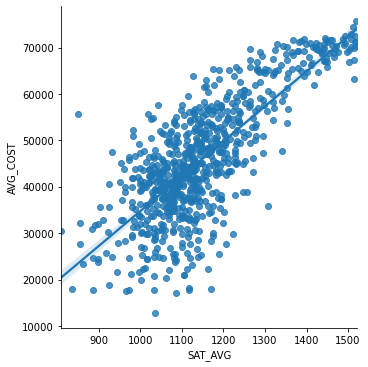

In [15]:
# Look at scatterplot with cost
sns.lmplot(x = 'SAT_AVG', y = 'AVG_COST', data = private)

In [16]:
# Show rows missing SAT_AVG
private[private['SAT_AVG'].isnull()]

,UNITID,NAME,AVG_COST,FAMINC,SAT_AVG,RET_RATE
2,101365,Herzing University-Birmingham,26128.0,26184.228503,NaN,0.5000
5,101675,Miles College,22828.0,23637.283898,NaN,0.5184
9,102058,Selma University,15822.0,16153.155932,NaN,0.3263
11,102270,Stillman College,21314.0,27754.876950,NaN,0.5967
12,102298,Talladega College,22514.0,27002.323770,NaN,0.6923
...,...,...,...,...,...,...
1397,491710,Yeshiva Gedolah of Cliffwood,14150.0,58552.450000,NaN,0.9500
1398,491765,Yeshivas Emek Hatorah,27190.0,58552.450000,NaN,0.7527
1399,491817,Seminary Bnos Chaim,19886.0,58552.450000,NaN,0.7527
1400,492801,Drury University-College of Continuing Profess...,19707.0,58552.450000,NaN,0.7568


I'm going to remove those rows because there are too many to impute.

In [17]:
# Remove rows with missing values for SAT_AVG
priv_clean = private[private['SAT_AVG'].notnull()]

In [18]:
# Check output
priv_clean.head()

,UNITID,NAME,AVG_COST,FAMINC,SAT_AVG,RET_RATE
0,100937,Birmingham-Southern College,52176.0,86672.871041,1232.0,0.7769
1,101189,Faulkner University,33944.0,36952.206116,1069.0,0.5611
3,101435,Huntingdon College,35685.0,53792.633136,1100.0,0.6602
4,101541,Judson College,31735.0,28123.817955,1054.0,0.5973
6,101693,University of Mobile,35463.0,53850.791005,1094.0,0.7216


In [19]:
# Check shape
priv_clean.shape

(768, 6)

## 02. Duplicates

In [20]:
# Check for duplicates
dups = priv_clean.duplicated()

In [21]:
# Check shape
dups.shape

(768,)

## 03. Extreme values

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVG_COST', ylabel='Density'>

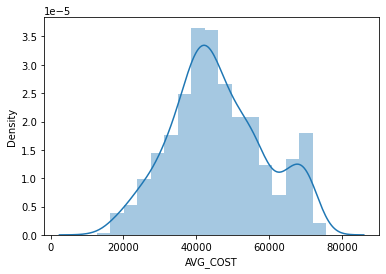

In [22]:
# Check distribution of variables - average cost
sns.distplot(priv_clean['AVG_COST'])

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SAT_AVG', ylabel='Density'>

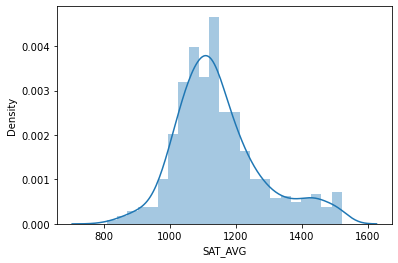

In [23]:
# Check distribution of variables - average SAT
sns.distplot(priv_clean['SAT_AVG'])

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FAMINC', ylabel='Density'>

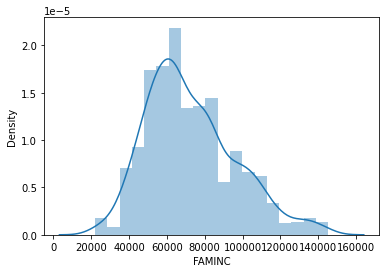

In [24]:
# Check distribution of variables - average family income
sns.distplot(priv_clean['FAMINC'])

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RET_RATE', ylabel='Density'>

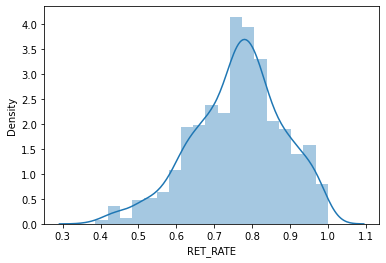

In [25]:
# Check distribution of variables - retention rate
sns.distplot(priv_clean['RET_RATE'])

In [26]:
# Get descriptive stats for all variables
priv_clean.describe()

,UNITID,AVG_COST,FAMINC,SAT_AVG,RET_RATE
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,187005.007812,45939.281250,72572.112752,1148.290365,0.760764
std,55183.099612,12931.413497,23694.681951,132.467635,0.119263
min,100937.000000,12714.000000,21952.625348,809.000000,0.386000
25%,152591.750000,37387.250000,55287.556057,1060.750000,0.686150
50%,182155.500000,44440.500000,67829.314536,1126.000000,0.770100
75%,213868.500000,54483.750000,85995.405459,1206.250000,0.837750
max,489937.000000,75735.000000,145228.221830,1522.000000,1.000000


# 03. Scatterplots and correlation

## 01. Scatterplots

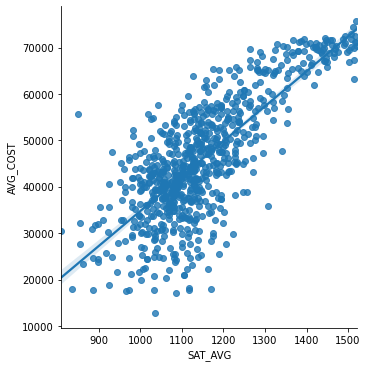

In [27]:
# Show scatterplot of average SAT and average cost
sns.lmplot(x = 'SAT_AVG', y = 'AVG_COST', data = priv_clean)

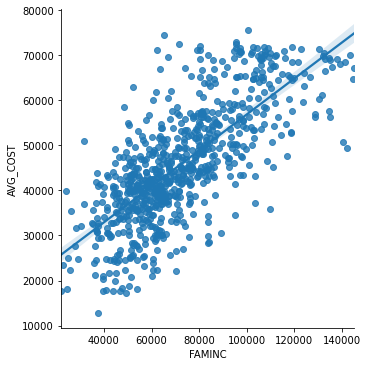

In [28]:
# Show scatterplot of average family income and average cost
sns.lmplot(x = 'FAMINC', y = 'AVG_COST', data = priv_clean)

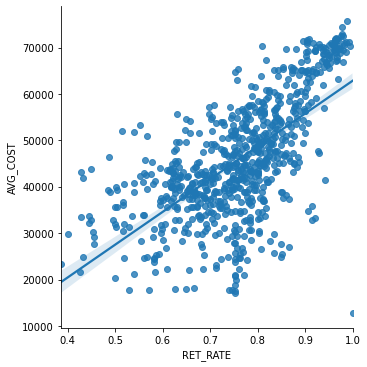

In [29]:
# Show scatterplot of retention rate and average cost
sns.lmplot(x = 'RET_RATE', y = 'AVG_COST', data = priv_clean)

## 02. Correlation

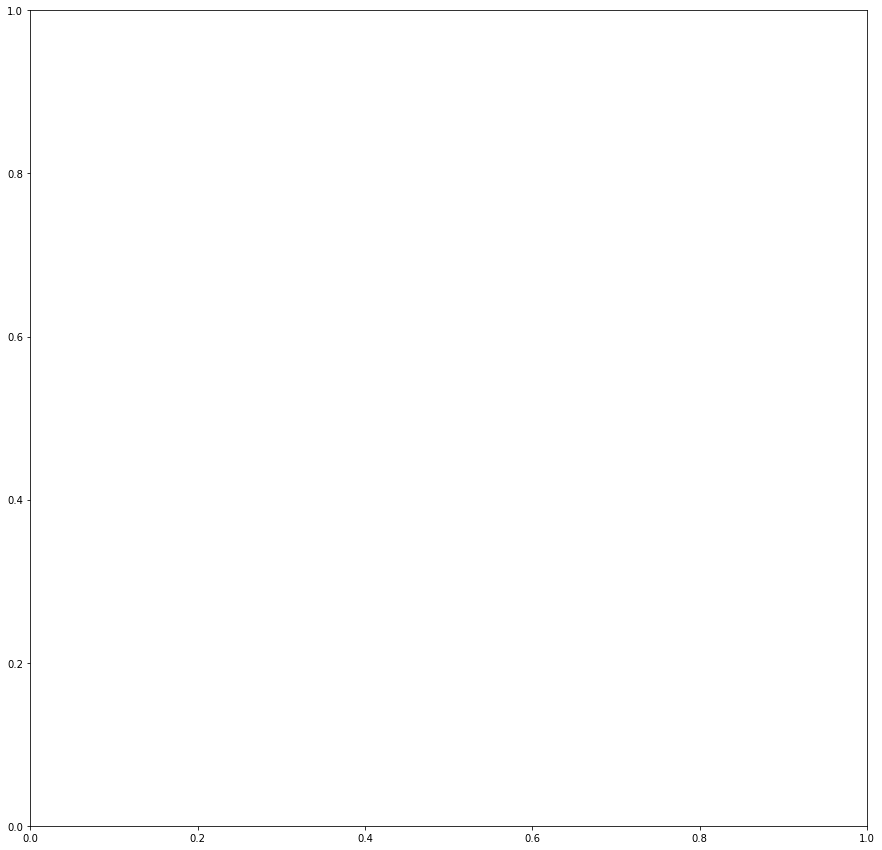

In [30]:
# Create subplot using matplotlib
f,ax = plt.subplots(figsize=(15,15))

In [31]:
# Create correlation heatmap for these four variables
priv_corr = sns.heatmap(priv_clean.corr(), annot = True, ax = ax)

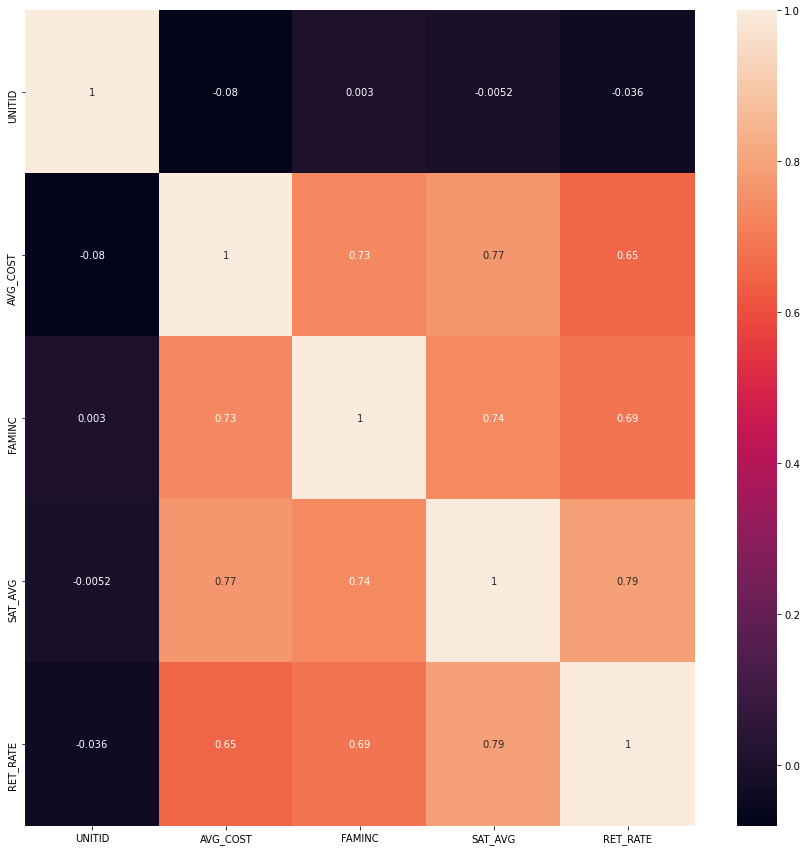

In [32]:
# Show heatmap
priv_corr.figure

There appears to be collinearity between the data I was going to use for the independent variables. Nevertheless, I will proceed with the regression to see what happens.

# 04. Hypothesis

A private, non-profit institution with a higher average SAT score of enrolled students, higher average family income of enrolled students, and a higher retention rate will have a higher average cost of attendance.

# 05. Prep for regression

In [33]:
# Reshape variables into NumPy arrays & put into separate objects
X = priv_clean[['SAT_AVG', 'FAMINC', 'RET_RATE']].to_numpy()
y = priv_clean['AVG_COST'].values.reshape(-1,1)

In [34]:
# Check X
X

array([[1.23200000e+03, 8.66728710e+04, 7.76900000e-01],
       [1.06900000e+03, 3.69522061e+04, 5.61100000e-01],
       [1.10000000e+03, 5.37926331e+04, 6.60200000e-01],
       ...,
       [1.42700000e+03, 8.61439379e+04, 7.52700000e-01],
       [1.03500000e+03, 6.48241179e+04, 7.57300000e-01],
       [9.78000000e+02, 3.62653871e+04, 5.40200000e-01]])

In [35]:
# Check y
y

array([[52176.],
       [33944.],
       [35685.],
       [31735.],
       [35463.],
       [36361.],
       [46474.],
       [51969.],
       [39383.],
       [37562.],
       [38173.],
       [24473.],
       [25303.],
       [29827.],
       [59901.],
       [38834.],
       [37349.],
       [28424.],
       [51578.],
       [53611.],
       [44746.],
       [56491.],
       [69018.],
       [31311.],
       [49474.],
       [45605.],
       [71745.],
       [63875.],
       [40950.],
       [55758.],
       [27086.],
       [54445.],
       [43906.],
       [46764.],
       [64484.],
       [57546.],
       [63047.],
       [54912.],
       [52143.],
       [71756.],
       [61776.],
       [42424.],
       [42620.],
       [60487.],
       [70862.],
       [49512.],
       [69725.],
       [65220.],
       [64732.],
       [65185.],
       [44800.],
       [69155.],
       [71060.],
       [39946.],
       [65419.],
       [44768.],
       [72097.],
       [35786.],
       [60930.

In [36]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 06. Regression analysis

In [37]:
# Create regression object
regression = LinearRegression()

In [38]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict values of y using X
y_predicted = regression.predict(X_test)

In [40]:
# Show y_predicted
y_predicted

array([[40914.95121701],
       [38264.50140985],
       [42937.08955056],
       [58573.45010063],
       [58839.59356205],
       [33539.33259968],
       [42013.38994763],
       [45336.7864434 ],
       [61831.30181727],
       [39043.79167052],
       [40204.40800723],
       [46015.65131068],
       [39098.03377194],
       [58745.4804231 ],
       [60496.88880787],
       [40828.05583264],
       [45450.77150394],
       [37974.67798191],
       [32547.76436424],
       [72695.00352339],
       [55154.85984776],
       [46965.77766171],
       [49933.52309398],
       [42328.75581725],
       [47417.91230962],
       [69782.07200527],
       [45449.41807661],
       [53012.32824818],
       [32643.70430023],
       [39324.30144483],
       [45852.97698172],
       [47499.88542449],
       [37707.08406685],
       [46722.94770862],
       [68598.47255519],
       [48079.90697342],
       [40464.08248139],
       [37265.42595257],
       [44877.64962004],
       [44242.59485839],


Because it is a multiple regression, there are too many dimensions to plot.

In [41]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [42]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[49.90060983  0.19342626 70.82997798]]
Mean squared error:  54764959.31139109
R2 score:  0.6623040989698088


In [43]:
# Compare the actual and predicted values of y.

data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,41722.0,40914.951217
1,31175.0,38264.501410
2,48350.0,42937.089551
3,59901.0,58573.450101
4,61900.0,58839.593562
5,37382.0,33539.332600
6,48123.0,42013.389948
7,44962.0,45336.786443
8,66950.0,61831.301817
9,41130.0,39043.791671


This model is not a good fit. Although the r2 score is .66 which is pretty good, the mean squared error is gigantic, meaning that the predicted values were very different from the actual values and thus very inaccurate.

Possible data bias: the data set was pretty small to begin with and ended up being even smaller because I had to remove a lot of rows with missing values. Also, this subset is probably a lot wealthier than the general population; you have to able to afford to go to college or get a loan to attend. You also have to test well in order to be accepted into a college; so the average SAT scores will necessarily tend to be higher values, with a minimum threshold. Retention rate is probably a little bit random. Students will leave if they don't think they can afford to stay, but it it possible that random events having to do with health, realizing it's not for them, etc. are more likely reasons for students to leave school. 

# 07. Perform linear regression analysis - SAT_AVG & FAMINC

## 01. Pre-regression checks

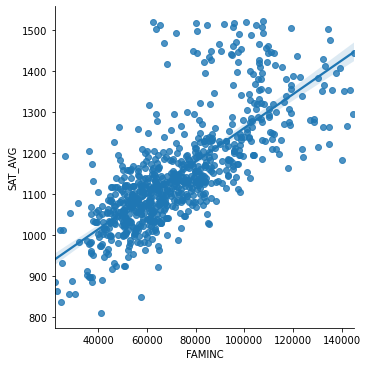

In [44]:
# Create scatterplot of the variables
sns.lmplot(x = 'FAMINC', y = 'SAT_AVG', data = priv_clean)

Hypothesis: A higher average family income of enrolled students at a private non-profit institution indicates a higher average SAT score of enrolled students at that institution.

In [45]:
# Get descriptive stats
priv_clean[['SAT_AVG', 'FAMINC']].describe()

,SAT_AVG,FAMINC
count,768.000000,768.000000
mean,1148.290365,72572.112752
std,132.467635,23694.681951
min,809.000000,21952.625348
25%,1060.750000,55287.556057
50%,1126.000000,67829.314536
75%,1206.250000,85995.405459
max,1522.000000,145228.221830


In [46]:
# Reshape variables into NumPy arrays and put into separate objects
X1 = priv_clean['FAMINC'].values.reshape(-1,1)
y1 = priv_clean['SAT_AVG'].values.reshape(-1,1)

In [47]:
# Check X1
X1

array([[ 86672.871041],
       [ 36952.206116],
       [ 53792.633136],
       [ 28123.817955],
       [ 53850.791005],
       [ 50868.943834],
       [108313.94042 ],
       [ 79894.033639],
       [ 50928.444106],
       [ 53447.115385],
       [ 64437.997245],
       [ 42395.8976  ],
       [ 51145.723404],
       [ 83701.980096],
       [ 87378.763889],
       [ 69960.702597],
       [ 75993.588697],
       [ 52772.823077],
       [ 63280.356055],
       [ 83761.273464],
       [ 61450.927923],
       [ 77359.229213],
       [105779.20369 ],
       [ 36853.217742],
       [ 74611.54371 ],
       [ 50387.284382],
       [ 97309.962441],
       [ 86461.306818],
       [ 43645.35567 ],
       [ 57645.359477],
       [ 54545.357827],
       [ 50727.653469],
       [ 61767.995825],
       [ 78115.389831],
       [106641.77485 ],
       [ 68501.056962],
       [ 52345.545872],
       [ 50278.626765],
       [ 55905.236295],
       [104313.01232 ],
       [ 61810.607784],
       [ 57247.2

In [48]:
# Check y1
y1

array([[1232.],
       [1069.],
       [1100.],
       [1054.],
       [1094.],
       [ 999.],
       [1228.],
       [1130.],
       [1119.],
       [1032.],
       [1195.],
       [1015.],
       [1004.],
       [1222.],
       [1346.],
       [1257.],
       [1193.],
       [1034.],
       [1147.],
       [1170.],
       [1103.],
       [1163.],
       [1288.],
       [ 982.],
       [1142.],
       [1055.],
       [1446.],
       [1126.],
       [1053.],
       [ 849.],
       [1002.],
       [1120.],
       [1022.],
       [1143.],
       [1321.],
       [1042.],
       [1158.],
       [1031.],
       [ 983.],
       [1368.],
       [1158.],
       [1022.],
       [1080.],
       [1240.],
       [1330.],
       [1240.],
       [1468.],
       [1189.],
       [1285.],
       [1237.],
       [1084.],
       [1366.],
       [1409.],
       [1078.],
       [1174.],
       [1039.],
       [1445.],
       [1307.],
       [1249.],
       [1126.],
       [1056.],
       [1300.],
       [

In [49]:
# Split data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

## 02. Regression analysis

In [50]:
# Create a regression object
regression1 = LinearRegression()

In [51]:
# Fit regression object onto training set
regression1.fit(X1_train, y1_train)

LinearRegression()

In [52]:
# Predict y values using x
y1_predicted = regression1.predict(X1_test)

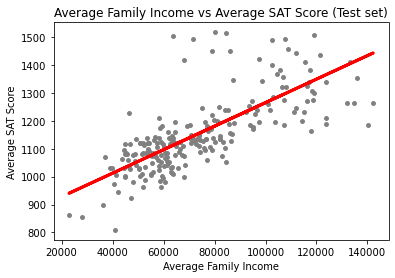

In [53]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Average Family Income vs Average SAT Score (Test set)')
plot_test.xlabel('Average Family Income')
plot_test.ylabel('Average SAT Score')
plot_test.show()

It looks like the line appears to fit the data pretty well for smaller average family income, but there is a lot of variability for larger average family income.

In [54]:
# Create objects to contain model summary statistics
rmse1 = mean_squared_error(y1_test, y1_predicted)
r2_1 = r2_score(y1_test, y1_predicted)

In [55]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[49.90060983  0.19342626 70.82997798]]
Mean squared error:  8126.119469531781
R2 score:  0.5206371224908781


In [56]:
# Look at y1_predicted
y1_predicted

array([[1073.10930042],
       [1110.00019807],
       [1116.9824601 ],
       [1211.77760707],
       [1294.6539817 ],
       [1008.15989793],
       [1092.53067217],
       [1157.23845156],
       [1111.95546677],
       [1102.02892488],
       [1057.47904354],
       [1180.74275592],
       [1105.30583513],
       [1364.27633841],
       [1259.0341381 ],
       [1071.25424761],
       [1141.24674235],
       [1097.03212725],
       [1062.69644935],
       [1345.16698102],
       [1238.42357669],
       [1190.50806263],
       [1179.02947345],
       [1107.11548088],
       [1207.91517817],
       [1296.94812166],
       [1143.64706584],
       [1254.7622339 ],
       [1017.0358543 ],
       [1082.92727076],
       [1154.34696076],
       [1189.24817829],
       [1031.56773259],
       [1195.08028688],
       [1275.56130277],
       [1175.63065495],
       [1062.11538442],
       [1110.08389021],
       [1173.23405549],
       [1104.13749156],
       [1124.0551633 ],
       [1040.560

In [57]:
# Compare actual to predicted values of y
data_compare1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_compare1.head(30)

,Actual,Predicted
0,1120.0,1073.109300
1,1033.0,1110.000198
2,1120.0,1116.982460
3,1346.0,1211.777607
4,1275.0,1294.653982
5,1032.0,1008.159898
6,1124.0,1092.530672
7,1131.0,1157.238452
8,1503.0,1111.955467
9,1056.0,1102.028925


This model isn't a good fit either. The r2 score is 0.52 which is not good, and the mean squared error is very large, meaning that the predicted values were different from the actual values and thus inaccurate.

Possible data bias: the data set was pretty small to begin with and ended up being even smaller because I had to remove a lot of rows with missing values. Also, this subset is probably a lot wealthier than the general population; you have to able to afford to go to college or get a loan to attend. You also have to test well in order to be accepted into a college; so the average SAT scores will necessarily tend to be higher values, with a minimum threshold.